In [ ]:
from google.colab import files  # For uploading/downloading files in Colab

# --- Data Handling ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pandas display ALL data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [ ]:
uploaded = files.upload() # Upload Dataset - Hospital LOS Prediction.csv

Saving Dataset - Hospital LOS Prediction.csv to Dataset - Hospital LOS Prediction.csv


In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/Dataset/Dataset - Hospital LOS Prediction.csv")
data1

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,NaN,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,4,gynecology,F,Dr Sarah,2,43001,11-20,Female,Trauma,Minor,High Blood Pressure,3,No,4105.795901,10
499996,13,gynecology,F,Dr Olivia,8,85601,31-40,Female,Emergency,Moderate,Other,2,No,4631.550257,11
499997,2,gynecology,B,Dr Sarah,3,22447,11-20,Female,Emergency,Moderate,High Blood Pressure,2,No,5456.930075,8
499998,2,radiotherapy,A,Dr John,1,29957,61-70,Female,Trauma,Extreme,Diabetes,2,No,4694.127772,23


## **Context:**

Hospital management is a vital area that gained a lot of attention during the COVID-19 pandemic. **Inefficient distribution of resources like beds, ventilators might lead to a lot of complications**. However, this can be mitigated by **predicting the length of stay (LOS) of a patient before getting admitted**. Once this is determined, the hospital can plan a suitable treatment, resources, and staff to reduce the LOS and increase the chances of recovery. The rooms and bed can also be planned in accordance with that.

**HealthPlus hospital has been incurring a lot of losses in revenue and life due to its inefficient management system.** They have been unsuccessful in allocating pieces of equipment, beds, and hospital staff fairly. **A system that could estimate the length of stay (LOS) of a patient can solve this problem to a great extent.**

In [ ]:
data1.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,NaN,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


## **Data Dictionary:**

The data contains various information recorded during the time of admission of the patient. It only contains **records of patients who were admitted to the hospital.** The detailed data dictionary is given below:


* **patientid**: Patient ID
* **Age**: Range of age of the patient
* **gender**: Gender of the patient
* **Type of Admission**: Trauma, emergency or urgent
* **Severity of Illness**: Extreme, moderate, or minor
* **health_condition**s: Any previous health conditions suffered by the patient
* **Visitors with Patient**: The number of patients who accompany the patient
* **Insurance**: Does the patient have health insurance or not?
* **Admission_Deposit**: The deposit paid by the patient during admission
* **Stay (in days)**: The number of days that the patient has stayed in the hospital. This is the **target variable**
* **Available Extra Rooms in Hospital**: The number of rooms available during admission
* **Department**: The department which will be treating the patient
* **Ward_Facility_Code**: The code of the ward facility in which the patient will be admitted
* **doctor_name**: The doctor who will be treating the patient
* **staff_available**: The number of staff who are not occupied at the moment in the ward


## **Objective:**

As a Data Scientist, you have been hired by HealthPlus to analyze the data, find out **what factors affect the LOS the most, and come up with a machine learning model which can predict the LOS of a patient** using the data available during admission and after running a few tests. Also, **bring about useful insights and policies from the data, which can help the hospital to improve their health care infrastructure and revenue.**

In [ ]:
# EDA
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  348112 non-null  object 
 11  Visitors with Patient              5000

health_conditions is the only column with missing values (about ~150k rows).
Impute as "Unknown/None"


In [ ]:
data1['health_conditions'] = data1['health_conditions'].fillna('Unknown')

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  500000 non-null  object 
 11  Visitors with Patient              5000

In [ ]:
# Check for duplicates
data1.duplicated().sum() # Check for zero duplicates

np.int64(0)

In [ ]:
# Continuous Variables
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Available Extra Rooms in Hospital,500000.0,3.638800,2.698124,0.000000,2.000000,3.000000,4.000000,24.00000
staff_available,500000.0,5.020470,3.158103,0.000000,2.000000,5.000000,8.000000,10.00000
patientid,500000.0,63150.519058,41689.479956,-3269.000000,25442.000000,57864.000000,103392.000000,134400.00000
Visitors with Patient,500000.0,3.549414,2.241054,0.000000,2.000000,3.000000,4.000000,32.00000
Admission_Deposit,500000.0,4722.315734,1047.324220,1654.005148,4071.714532,4627.003792,5091.612717,10104.72639
Stay (in days),500000.0,12.381062,7.913174,3.000000,8.000000,9.000000,11.000000,51.00000


Available Extra Rooms in Hospital: Range is 0-24. Makes sense. Capacity is affected by LOS. Avoid Getting 0 available rooms. On avg, 3.6 rooms are available


Staff Available: Range 0-10. Avoid having 0 staff available.
pateint ID: Ignore / Drop eventually??? On avg = 5


Visitors with Patient: 0-32. Doesnt affect LOS? Drop? Avoid Outliers


Admission Deposit: 1047-10104. This range is large. Maybe severity correlates with Deposit. Maybe connected to LOS?


Stay (in days): Target variable (y) !!!

In [ ]:
cat_col = data1.select_dtypes(include='object').columns # Get categorical columns
print("Catagorical Columns:",cat_col,"\n") # Print cat cols

print("\nRelative frequencies for each category:")

# Loop through categorical columns and get proportions
for column in cat_col:
  print(data1[column].value_counts(normalize=True)) # Normalized vals
  print("-"*50)

plt.figure(figsize=(8,6))

# Visualize proportions for easy readibility
#for column in cat_col:
    #plt.figure(figsize=(8,6))
    #data1[column].value_counts(normalize=True).plot(kind='bar')
    #plt.title(f"Proportions of {column}")
    #plt.ylabel("Proportion")
    #plt.xlabel(column)
    #plt.show()



Catagorical Columns: Index(['Department', 'Ward_Facility_Code', 'doctor_name', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Insurance'],
      dtype='object') 


Relative frequencies for each category:
Department
gynecology            0.686956
radiotherapy          0.168630
anesthesia            0.088358
TB & Chest disease    0.045780
surgery               0.010276
Name: proportion, dtype: float64
--------------------------------------------------
Ward_Facility_Code
F    0.241076
D    0.238110
B    0.207770
E    0.190748
A    0.093102
C    0.029194
Name: proportion, dtype: float64
--------------------------------------------------
doctor_name
Dr Sarah     0.199192
Dr Olivia    0.196704
Dr Sophia    0.149506
Dr Nathan    0.141554
Dr Sam       0.111422
Dr John      0.102526
Dr Mark      0.088820
Dr Isaac     0.006718
Dr Simon     0.003558
Name: proportion, dtype: float64
--------------------------------------------------
Age
21-30     0

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

Num Bins: 49


/tmp/ipython-input-3439198344.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


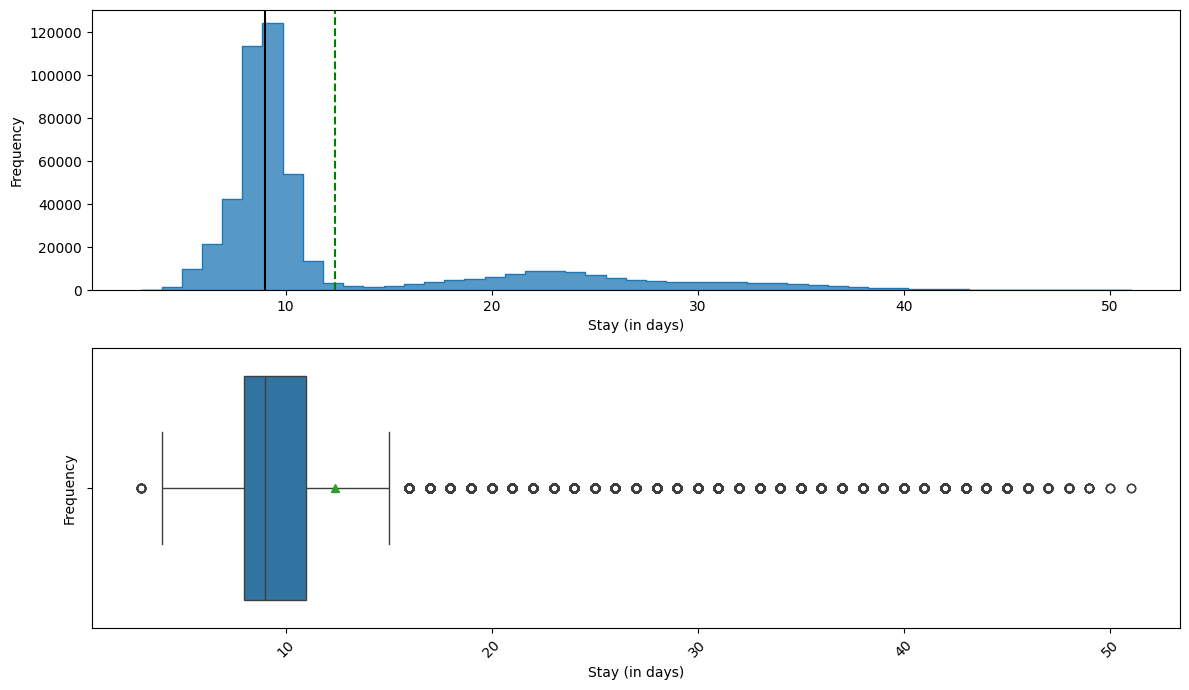

ax1: mean: 12.381062 	 ax2 median: 9.0
ax2: mean: 12.381062 	 ax2 median: 9.0
--------------------------------------------------


In [ ]:
#@title Univariate Analysis Functions
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number
    """
    if bins == None:
        bins = len(data[feature].unique())
        print("Num Bins:",bins)
    figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=figsize) # returns a tuple of 2 axes
    # Make Histogram
    sns.histplot(data=data, x=feature, kde=kde, element="step", ax=ax1, bins=bins)
    ax1.set_xlabel(feature)
    ax1.set_ylabel("Frequency")
    ax1.axvline(data[feature].mean(), color='green', linestyle='--')
    ax1.axvline(data[feature].median(), color='k', linestyle='-')
    # Make Boxplot
    sns.boxplot(data=data, x=feature, ax=ax2, showmeans= True)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
    ax2.set_xlabel(feature)
    ax2.set_ylabel("Frequency")
    figure.tight_layout()
    plt.show()
    print("ax1: mean:", data[feature].mean(), "\t ax2 median:", data[feature].median())
    print("ax2: mean:",  data[feature].mean(), "\t ax2 median:", data[feature].median())
    print("-"*50)
    return


# Call function
histogram_boxplot(data1, "Stay (in days)", kde= False) # We want to predict this


I notice the right skew of patient's length of stay. This tail portion of the distribution is what I should want to focus on being able to proedict with accuracy

In [ ]:
# Get continuous variable from my dataset
cont_cols = data1.select_dtypes(include='number').columns
print("Continuous Columns:",cont_cols,"\n")

Continuous Columns: Index(['Available Extra Rooms in Hospital', 'staff_available', 'patientid',
       'Visitors with Patient', 'Admission_Deposit', 'Stay (in days)'],
      dtype='object') 



/tmp/ipython-input-3439198344.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


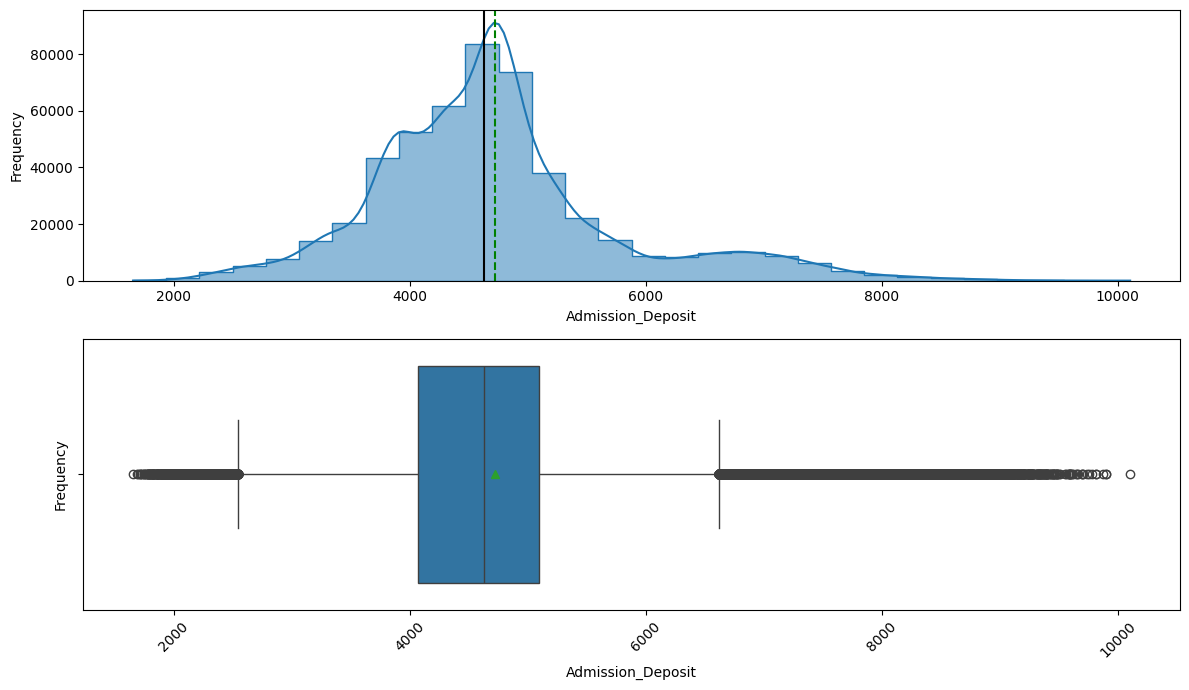

ax1: mean: 4722.3157339630625 	 ax2 median: 4627.0037919999995
ax2: mean: 4722.3157339630625 	 ax2 median: 4627.0037919999995
--------------------------------------------------


In [ ]:
histogram_boxplot(data1, 'Admission_Deposit', kde=True, bins = 30)

/tmp/ipython-input-3439198344.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


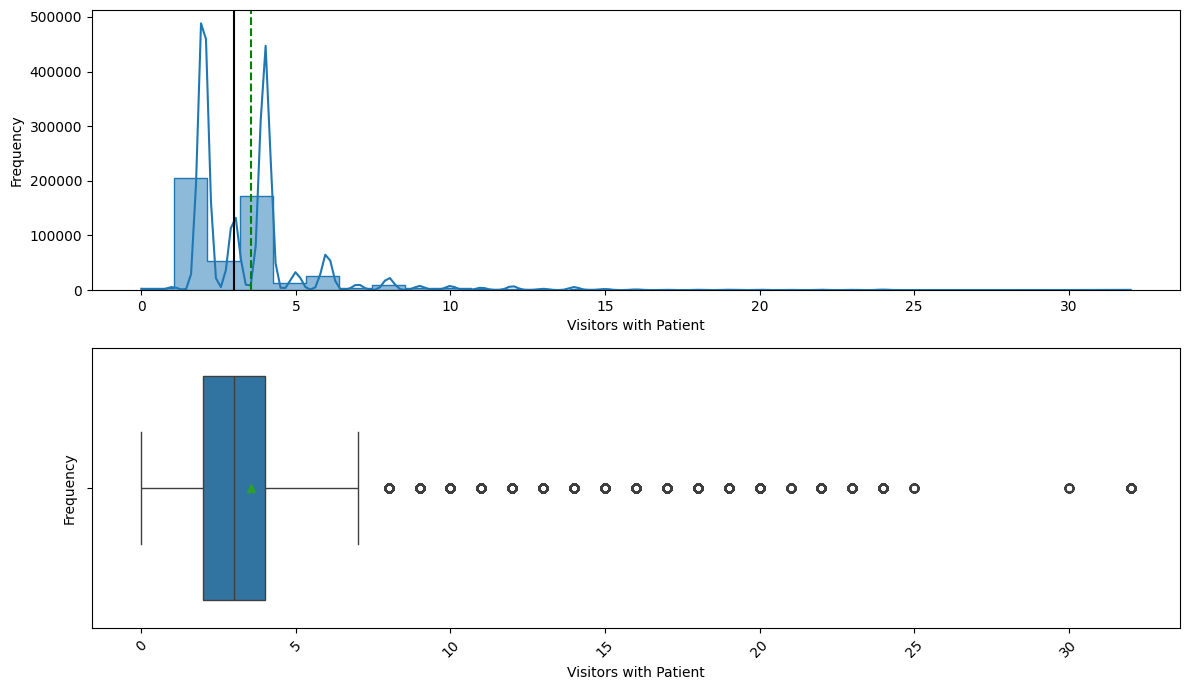

ax1: mean: 3.549414 	 ax2 median: 3.0
ax2: mean: 3.549414 	 ax2 median: 3.0
--------------------------------------------------


,Visitors with Patient
doctor_name,
Dr Simon,6004
Dr Isaac,11485
Dr Mark,171933
Dr John,192439
Dr Sam,204262
Dr Nathan,245902
Dr Sophia,258256
Dr Olivia,341773
Dr Sarah,342653


In [ ]:
# Lets look at the number of visitors per Doctor

i = data1.groupby('doctor_name')['Visitors with Patient'].sum().sort_values(ascending=True)
histogram_boxplot(data1, 'Visitors with Patient', kde=True, bins = 30)
i

Numeric Columns: Index(['Available Extra Rooms in Hospital', 'staff_available', 'patientid',
       'Visitors with Patient', 'Admission_Deposit', 'Stay (in days)'],
      dtype='object') 



<Axes: >

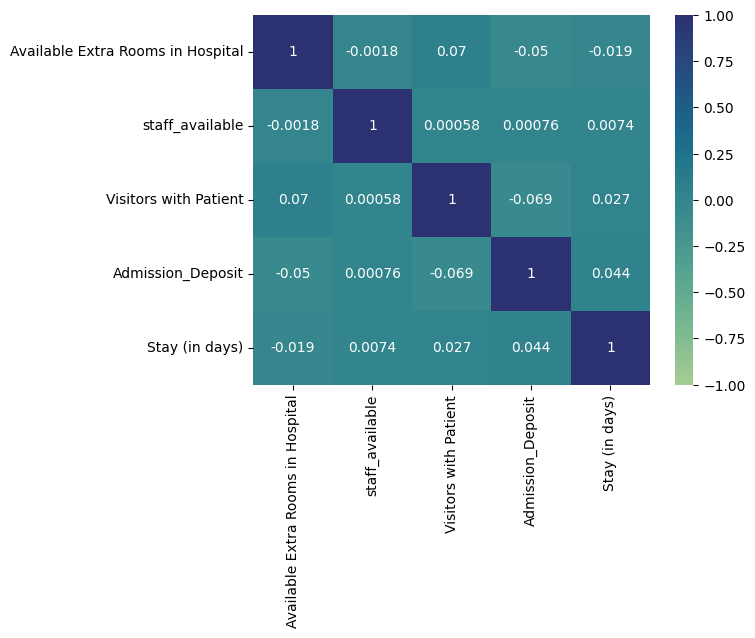

In [ ]:
#@title Bivariate Analysis Numeric
num_data = data1.select_dtypes(include='number') # Grabs numeric data from data1
print("Numeric Columns:",num_data.columns,"\n") # Grabs column names of those numeric data

# Drop redundant patient id
num_data = num_data.drop('patientid', axis=1) # drop row

num_data.corr() # correlation calculation among numeric features

# Make heatmaps
sns.heatmap(num_data.corr(), annot=True, cmap='crest', vmax=1, vmin = -1)


These is no high correlations among numeric features

Continuous Columns: Index(['Department', 'Ward_Facility_Code', 'doctor_name', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Insurance'],
      dtype='object') 



/tmp/ipython-input-4006359160.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Stay (in days)", y = "Ward_Facility_Code", data = data1, palette='viridis')


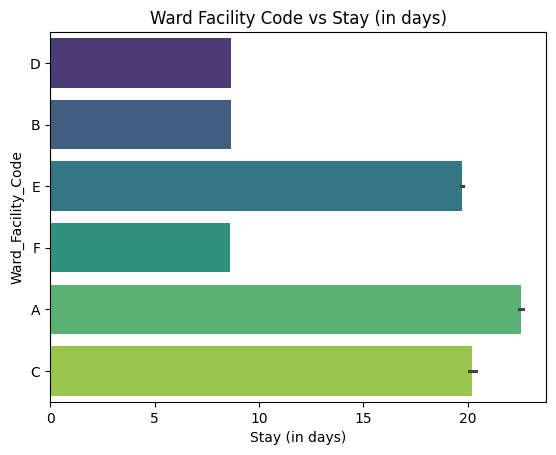

In [ ]:
#@title Bivariate Analysis Categorical
print("Continuous Columns:",cat_col,"\n")
sns.barplot(x = "Stay (in days)", y = "Ward_Facility_Code", data = data1, palette='viridis')
plt.title("Ward Facility Code vs Stay (in days)")
plt.show()


Differences exist in differences between D,B,F with E,A,C

In [ ]:
#  Look at the effect of two cataegorical variables on the dependent variable ot Interest
def stacked_barplot(data, predictor, target, norm):
  '''
  Makes a contingency table (frequency table): oredictor x target
    - Uses a dataframe
    - The feature trying to be used for prediction
    - The target that will show how many times the target is assigned per predictor
    - normalized values boolean option
  '''
  count = data[predictor].nunique() # Counts unique categories in predictor
  sorter = data[target].value_counts().index[-1] # picks the least frequent target level

  #tab1 = pd.crosstab(data[predictor], data[target], normalize='index') * 100 # optiom 1
  if norm == True:
    tab1 = pd.crosstab(data[predictor], data[target], normalize = 'index').sort_values(by=sorter, ascending=False) # Makes a contingency table (freq table)
  else:
    tab1 = pd.crosstab(data[predictor], data[target]).sort_values(by=sorter, ascending=False) # Makes a contingency table (freq table)
  print(tab1)
  tab1.plot(kind = 'bar', stacked = True, figsize = (count + 1, 5)) # Stacked makes stacked bars
  plt.legend(loc = 'upper left', bbox_to_anchor = (1,1), frameon = True)



Department          TB & Chest disease  anesthesia  gynecology  radiotherapy  \
Ward_Facility_Code                                                             
A                             0.101158    0.335353         0.0      0.453116   
B                             0.000000    0.000000         1.0      0.000000   
C                             0.090361    0.287662         0.0      0.621977   
D                             0.000000    0.000000         1.0      0.000000   
E                             0.176799    0.255510         0.0      0.567691   
F                             0.000000    0.000000         1.0      0.000000   

Department           surgery  
Ward_Facility_Code            
A                   0.110374  
B                   0.000000  
C                   0.000000  
D                   0.000000  
E                   0.000000  
F                   0.000000  


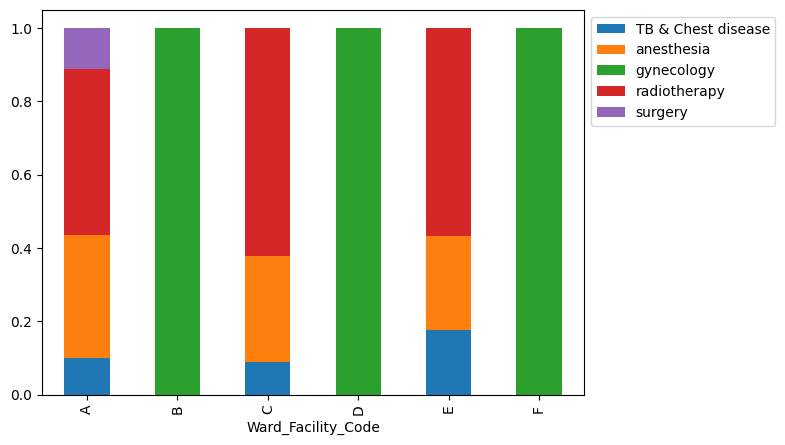

In [ ]:
#stacked_barplots = stacked_barplot(data1, 'Ward_Facility_Code', 'Stay (in days)', True)
stacked_barplot(data1, 'Ward_Facility_Code', 'Department', True)

gender                Female      Male     Other
Ward_Facility_Code                              
A                   0.175055  0.660158  0.164787
E                   0.174890  0.660977  0.164133
C                   0.171474  0.665137  0.163390
B                   1.000000  0.000000  0.000000
D                   1.000000  0.000000  0.000000
F                   1.000000  0.000000  0.000000
Age                     0-10     11-20     21-30     31-40     41-50  \
Ward_Facility_Code                                                     
E                   0.025646  0.000000  0.137931  0.238870  0.148636   
A                   0.018818  0.000000  0.091598  0.186698  0.139653   
C                   0.003151  0.000000  0.099267  0.181476  0.202987   
B                   0.000000  0.134264  0.400606  0.296982  0.168147   
D                   0.000000  0.123363  0.387922  0.297249  0.191466   
F                   0.000000  0.148509  0.440724  0.273856  0.136911   

Age                    51-60   

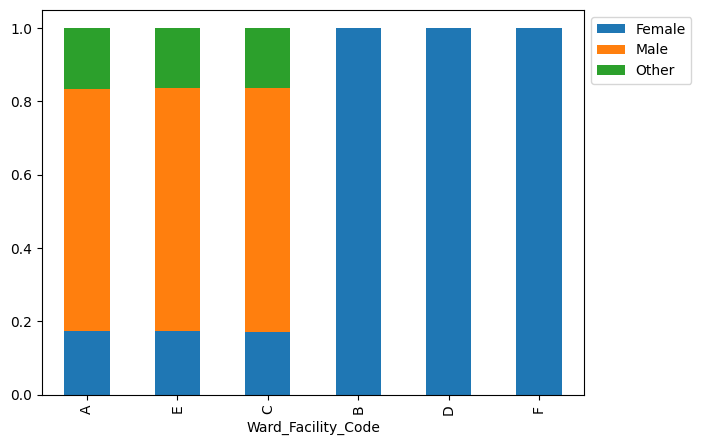

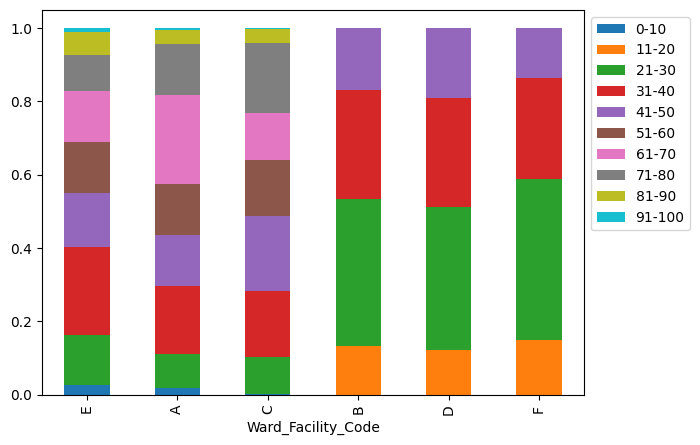

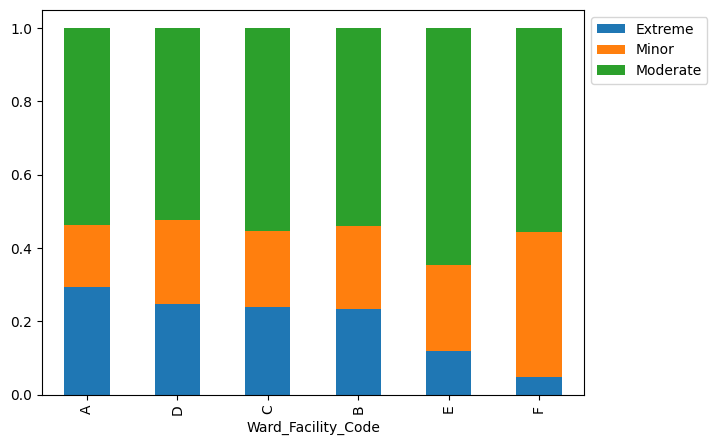

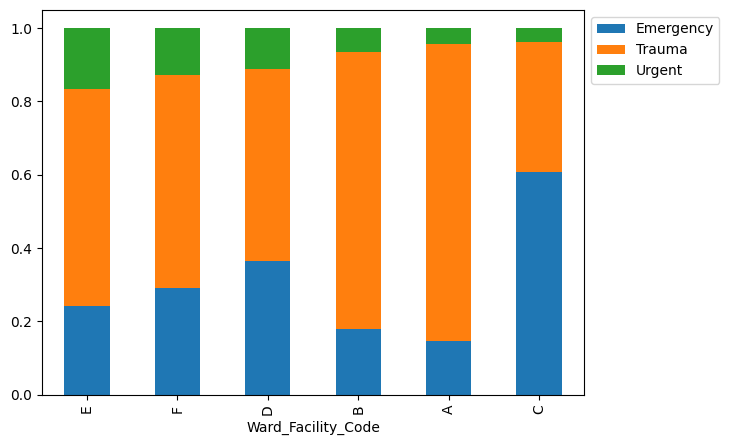

In [ ]:
stacked_barplot(data1, 'Ward_Facility_Code', 'gender', True)
stacked_barplot(data1, 'Ward_Facility_Code', 'Age', True)
stacked_barplot(data1, 'Ward_Facility_Code', 'Severity of Illness', True)
stacked_barplot(data1, 'Ward_Facility_Code', 'Type of Admission', True)

Ward A is the only facility performing surgeries, and it shows a noticeably longer LOS compared to other wards, consistent with patients requiring extended recovery time.

Wards B, D, and F are dominated by gynecology cases with mostly female patients, which explains shorter and more consistent LOS patterns there.

LOS variation across wards (e.g., higher in A and C, lower in B/D/F) suggests that type of care delivered in each ward drives differences in patient stay length more than demographic balance alone.


Although age groups are unevenly distributed across wards (younger patients clustered in B/D/F vs. wider age mix in A/C/E), the length of stay patterns align more strongly with ward specialization than with age.

This reinforces that clinical services (surgery, radiotherapy, gynecology, etc.) are the central determinant of LOS, while age is a secondary factor.

/tmp/ipython-input-3646498356.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = 'Age', x = 'Stay (in days)', data = data1, palette='viridis')


<Axes: xlabel='Stay (in days)', ylabel='Age'>

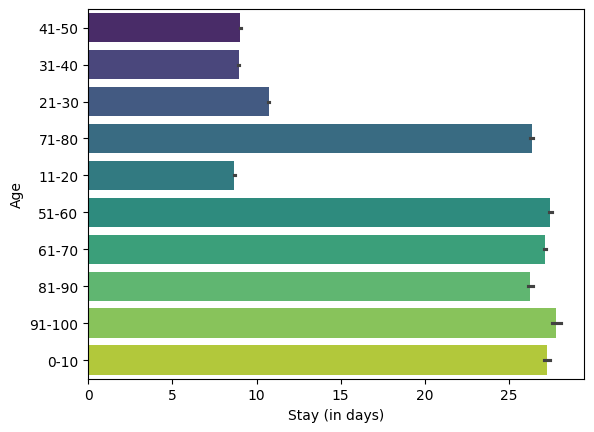

In [ ]:
sns.barplot(y = 'Age', x = 'Stay (in days)', data = data1, palette='viridis')

In [ ]:
data1.groupby('doctor_name')['Department'].agg(
    Department_name ='unique', # returns the unique departments that doctor worked in.
    Patients_Treated = 'count' # counts how many rows (patients) that doctor had.
).sort_values(by='Patients_Treated', ascending=False)

,Department_name,Patients_Treated
doctor_name,,
Dr Sarah,[gynecology],99596
Dr Olivia,[gynecology],98352
Dr Sophia,[gynecology],74753
Dr Nathan,[gynecology],70777
Dr Sam,[radiotherapy],55711
Dr John,"[TB & Chest disease, anesthesia, radiotherapy]",51263
Dr Mark,"[anesthesia, TB & Chest disease]",44410
Dr Isaac,[surgery],3359
Dr Simon,[surgery],1779


In [ ]:
data1.select_dtypes(include = ['object', 'category']).columns.tolist()

['Department',
 'Ward_Facility_Code',
 'doctor_name',
 'Age',
 'gender',
 'Type of Admission',
 'Severity of Illness',
 'health_conditions',
 'Insurance']

In [ ]:
# @ title ML Modeling
data2 = pd.get_dummies(
    data1,
    columns = data1.select_dtypes(include = ['object', 'category']).columns.tolist(),
    drop_first = True # get n-1 columns for each feature
    )

In [ ]:
x = data2.drop('Stay (in days)', axis=1) # drop column
y = data2['Stay (in days)']

In [ ]:
print(x.shape)
print(y.shape)

# Data split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Train Decision Tree
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Predict on test data
y_pred = model.predict(x_test)

# Report
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Confusion metrics
cf = confusion_matrix(y_test, y_pred)
print(cf)
print(classification_report(y_test, y_pred))

# Visualize in heatmap
sns.heatmap(cf, annot=True, cmap='crest', vmax=1, vmin = -1)

In [ ]:
print(x.shape)
print(y.shape)

# Data split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score as r2


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle = True, random_state=42)

def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
    return adjusted_r2

# Mean absoluate percentage error
def mape_score(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def model_performance_regression(model, predictors, target):
  pred = model.predict(predictors)
  r2 = r2_score(target,pred)
  adjr2 = adj_r2_score(predictors, target, pred)
  rmse = np.sqrt(mean_squared_error(target, pred))
  mae = mean_absolute_error(target, pred)
  mape = mape_score(target, pred)

  df_performance = pd.DataFrame({
      'Model': type(model).__name__,
      'R2_Score': r2,
      'Adj_R2_Score': adjr2,
      'RMSE': rmse,
      'MAPE': mape,
      'MAE': mae
  }, index=[0])
  return df_performance


(500000, 43)
(500000,)


In [ ]:
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(x_train, y_train)

#model_performance_regression(dt_regresspr, x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
dt_regressor_perf_test = model_performance_regression(dt_regressor, x_test, y_test)
dt_regressor_perf_test

,Model,R2_Score,Adj_R2_Score,RMSE,MAPE,MAE
0,DecisionTreeRegressor,0.943853,0.943836,1.877161,9.797425,1.183893


In [ ]:
# Visualize Trees to see most important factors in making decision
from sklearn import tree

In [ ]:
features = list(x.columns)
features

['Available Extra Rooms in Hospital',
 'staff_available',
 'patientid',
 'Visitors with Patient',
 'Admission_Deposit',
 'Department_anesthesia',
 'Department_gynecology',
 'Department_radiotherapy',
 'Department_surgery',
 'Ward_Facility_Code_B',
 'Ward_Facility_Code_C',
 'Ward_Facility_Code_D',
 'Ward_Facility_Code_E',
 'Ward_Facility_Code_F',
 'doctor_name_Dr John',
 'doctor_name_Dr Mark',
 'doctor_name_Dr Nathan',
 'doctor_name_Dr Olivia',
 'doctor_name_Dr Sam',
 'doctor_name_Dr Sarah',
 'doctor_name_Dr Simon',
 'doctor_name_Dr Sophia',
 'Age_11-20',
 'Age_21-30',
 'Age_31-40',
 'Age_41-50',
 'Age_51-60',
 'Age_61-70',
 'Age_71-80',
 'Age_81-90',
 'Age_91-100',
 'gender_Male',
 'gender_Other',
 'Type of Admission_Trauma',
 'Type of Admission_Urgent',
 'Severity of Illness_Minor',
 'Severity of Illness_Moderate',
 'health_conditions_Diabetes',
 'health_conditions_Heart disease',
 'health_conditions_High Blood Pressure',
 'health_conditions_Other',
 'health_conditions_Unknown',
 'Ins

In [ ]:
# Visualize a shallow decision tree
dt_regressor_visualize = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_regressor_visualize.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

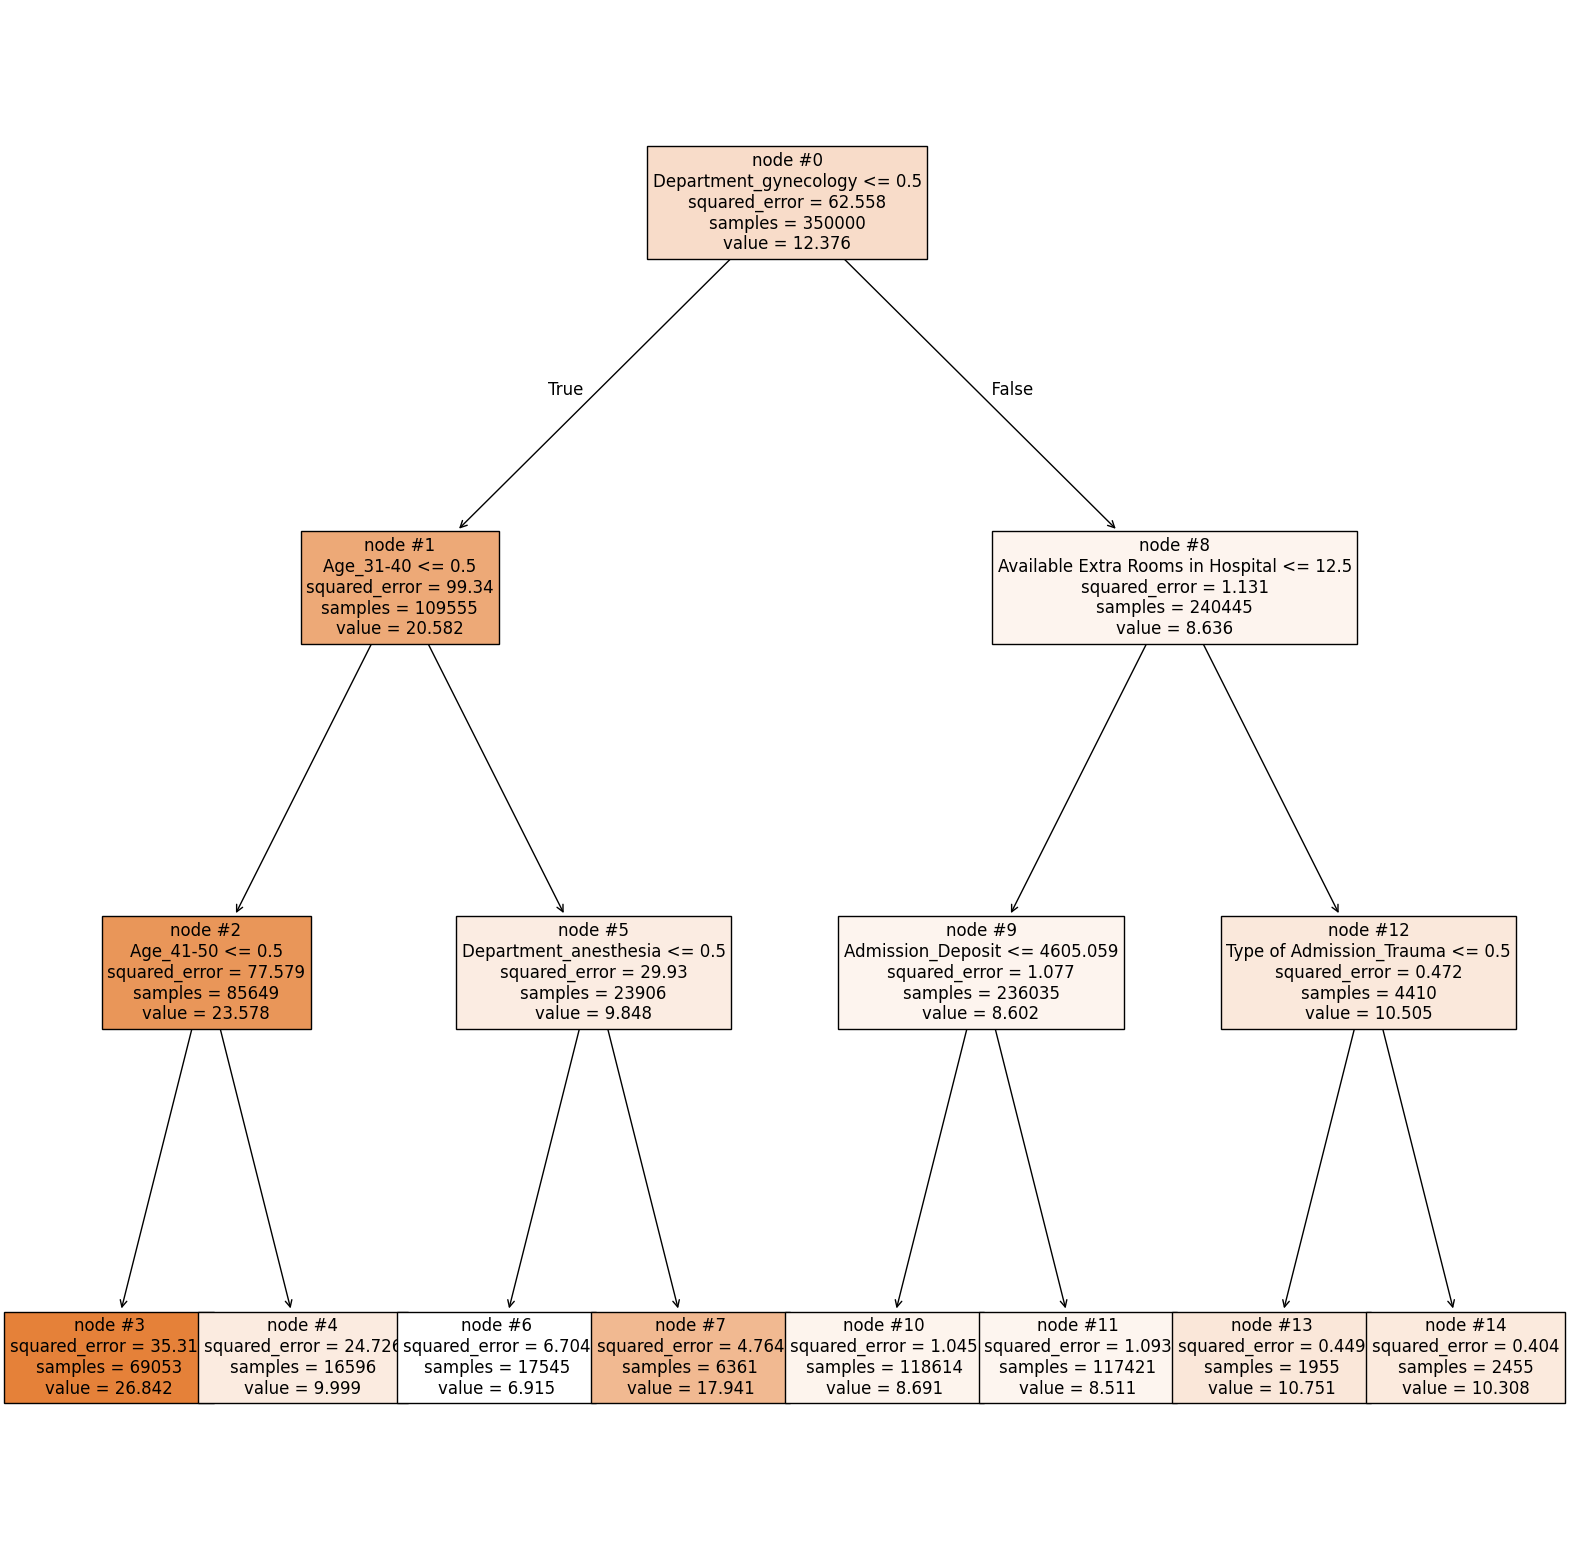

In [ ]:
plt.figure(figsize = (20,20))
tree.plot_tree(dt_regressor_visualize, feature_names=features, filled = True, fontsize= 12, node_ids = True, class_names = True);

In [ ]:
print(tree.export_text(dt_regressor_visualize, feature_names=features, show_weights=True)) # Might be more readable for use cases

|--- Department_gynecology <= 0.50
|   |--- Age_31-40 <= 0.50
|   |   |--- Age_41-50 <= 0.50
|   |   |   |--- value: [26.84]
|   |   |--- Age_41-50 >  0.50
|   |   |   |--- value: [10.00]
|   |--- Age_31-40 >  0.50
|   |   |--- Department_anesthesia <= 0.50
|   |   |   |--- value: [6.91]
|   |   |--- Department_anesthesia >  0.50
|   |   |   |--- value: [17.94]
|--- Department_gynecology >  0.50
|   |--- Available Extra Rooms in Hospital <= 12.50
|   |   |--- Admission_Deposit <= 4605.06
|   |   |   |--- value: [8.69]
|   |   |--- Admission_Deposit >  4605.06
|   |   |   |--- value: [8.51]
|   |--- Available Extra Rooms in Hospital >  12.50
|   |   |--- Type of Admission_Trauma <= 0.50
|   |   |   |--- value: [10.75]
|   |   |--- Type of Admission_Trauma >  0.50
|   |   |   |--- value: [10.31]



In [ ]:
# Bagging (Bootstrap Aggragating)
from sklearn.ensemble import BaggingRegressor
# Decision trees: "Let's make predictions by recursively splitting the data into groups that are as homogeneous as possible, then assigning each group the average"
# Bagging: “Let’s average many full-grown trees trained on bootstraps to reduce variance.”
# Random Forest: “Let’s average many bootstrapped trees, but also force them to look at different subsets of features, so they’re more diverse and less correlated.”

bagging_estimator = BaggingRegressor(random_state= 42)
bagging_estimator.fit(x_train, y_train)

BaggingRegressor(random_state=42)

In [ ]:
bagging_estimator_perf_test = model_performance_regression(bagging_estimator, x_test, y_test)
bagging_estimator_perf_test

,Model,R2_Score,Adj_R2_Score,RMSE,MAPE,MAE
0,BaggingRegressor,0.969072,0.969063,1.393198,7.877372,0.931766


In [ ]:
from sklearn.ensemble import RandomForestRegressor

randoma_forest_estimator = RandomForestRegressor(random_state=42)
randoma_forest_estimator.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
randoma_forest_estimator_perf_test = model_performance_regression(randoma_forest_estimator, x_test, y_test)
randoma_forest_estimator_perf_test

,Model,R2_Score,Adj_R2_Score,RMSE,MAPE,MAE
0,RandomForestRegressor,0.971928,0.97192,1.327311,7.527352,0.888548


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaboost_estimator = AdaBoostRegressor(random_state=42)
adaboost_estimator.fit(x_train, y_train)

AdaBoostRegressor(random_state=42)

In [ ]:
adaboost_estimator_perf_test = model_performance_regression(adaboost_estimator, x_test, y_test)
adaboost_estimator_perf_test

,Model,R2_Score,Adj_R2_Score,RMSE,MAPE,MAE
0,AdaBoostRegressor,0.917701,0.917677,2.27266,13.252706,1.533617


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_estimator = GradientBoostingRegressor(random_state=42)
gradient_boosting_estimator.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
gradient_boosting_estimator_perf_test = model_performance_regression(gradient_boosting_estimator, x_test, y_test)
gradient_boosting_estimator_perf_test

,Model,R2_Score,Adj_R2_Score,RMSE,MAPE,MAE
0,GradientBoostingRegressor,0.949619,0.949604,1.778165,10.175947,1.204983


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

xgboost_estimator = XGBRegressor(random_state=42)
xgboost_estimator.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
xgboost_estimator_perf_test = model_performance_regression(xgboost_estimator, x_test, y_test)
xgboost_estimator_perf_test

,Model,R2_Score,Adj_R2_Score,RMSE,MAPE,MAE
0,XGBRegressor,0.964042,0.964031,1.502228,8.85494,1.031396


In [ ]:
models_test_comp_df = pd.concat(
    [
        dt_regressor_perf_test.T,
        bagging_estimator_perf_test.T,
        randoma_forest_estimator_perf_test.T,
        adaboost_estimator_perf_test.T,
        gradient_boosting_estimator_perf_test.T,
        xgboost_estimator_perf_test.T
    ],
    axis=1
)

models_test_comp_df.columns = [
    'Decision Tree',
    'Bagging',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'XGBoost'
]

models_test_comp_df


,Decision Tree,Bagging,Random Forest,AdaBoost,Gradient Boosting,XGBoost
Model,DecisionTreeRegressor,BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,XGBRegressor
R2_Score,0.943853,0.969072,0.971928,0.917701,0.949619,0.964042
Adj_R2_Score,0.943836,0.969063,0.97192,0.917677,0.949604,0.964031
RMSE,1.877161,1.393198,1.327311,2.27266,1.778165,1.502228
MAPE,9.797425,7.877372,7.527352,13.252706,10.175947,8.85494
MAE,1.183893,0.931766,0.888548,1.533617,1.204983,1.031396


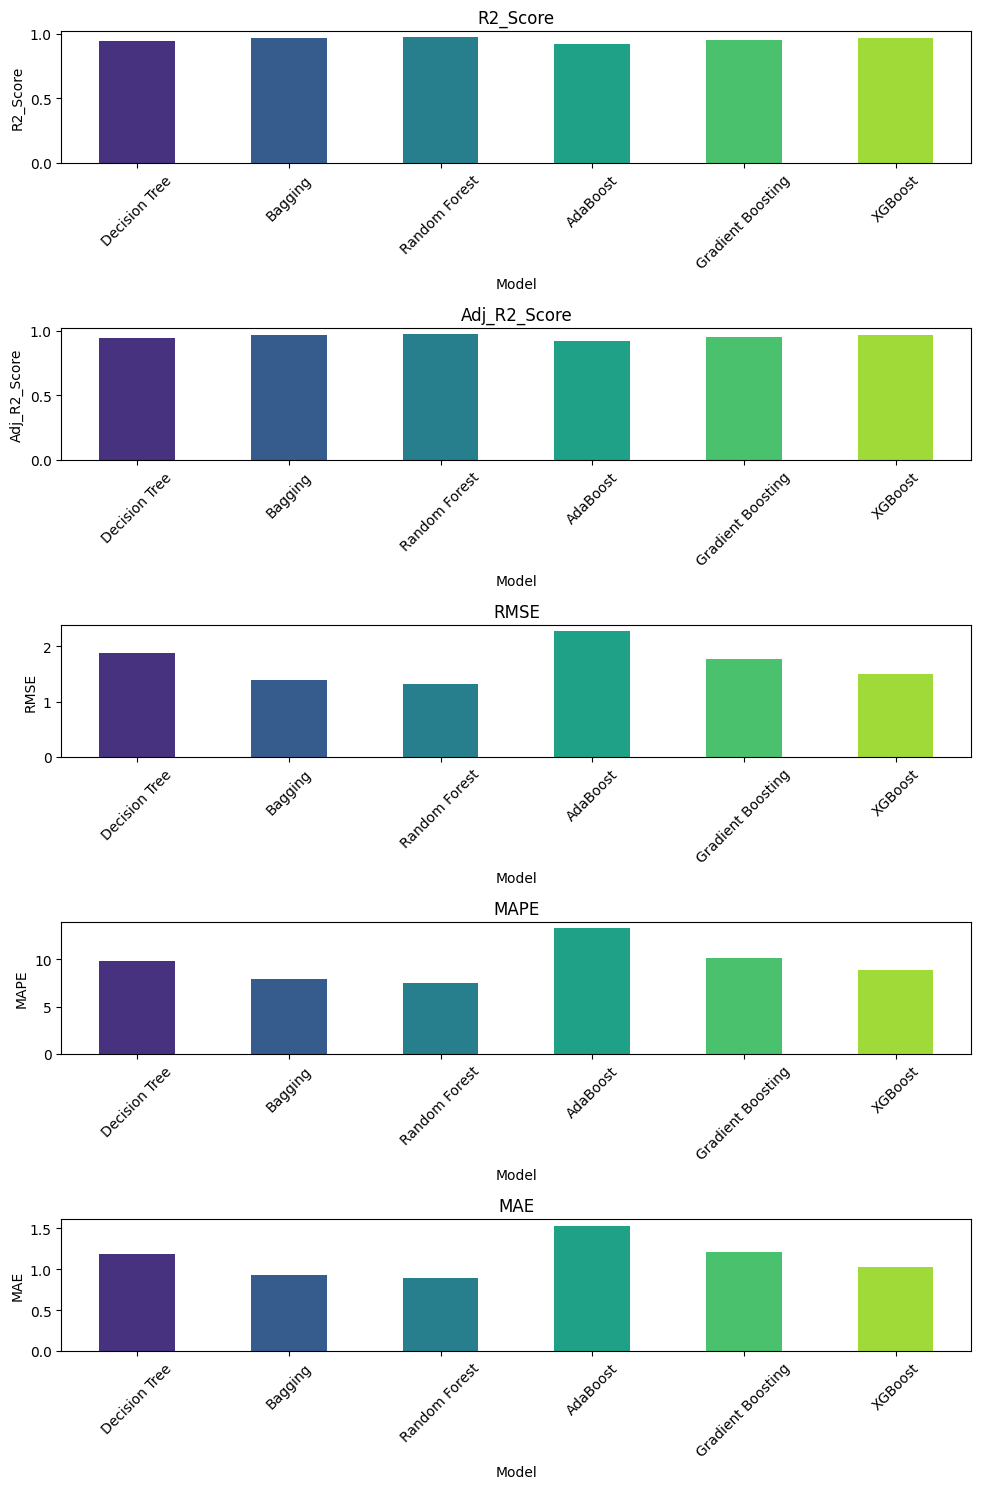

In [ ]:
# Transpose the DataFrame to have models as rows and metrics as columns for easier plotting
models_plot_df = models_test_comp_df.T.drop('Model', axis=1)

# Create subplots for each metric
fig, axes = plt.subplots(nrows=len(models_plot_df.columns), figsize=(10, 15))

# Define a color palette
colors = sns.color_palette('viridis', len(models_plot_df))

for i, col in enumerate(models_plot_df.columns):
    models_plot_df[col].plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(col)
    axes[i].set_ylabel(col)
    axes[i].set_xlabel("Model")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
rf_tuned = RandomForestRegressor(random_state=42)

rf_parameters = {
    'n_estimators': [100, 110, 120, 200],
    'max_depth': [None, 10, 15, 20,],
    'max_features': [0.8, 1.0]
}

In [ ]:
from seaborn.axisgrid import Grid
rf_grid_obj = GridSearchCV(rf_tuned, rf_parameters, cv=5, scoring = 'neg_mean_squared_error')
rf_grid_obj.fit(x_train, y_train)

In [ ]:
rf_tuned_regressor = rf_grid_obj.best_estimator_
rf_tuned_regressor.fit(x_train, y_train)

In [ ]:
rf_tuned_regressor_perf_test = model_performance_regression(rf_tuned_regressor, x_test, y_test)
rf_tuned_regressor_perf_test

In [ ]:
pd.concat([
    models_test_comp_df,
    rf_tuned_regressor_perf_test.T
], axis=1).T



In [ ]:
importances = rf_tuned_regressor.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(features)), importances[indices], color='violet', align='center');
plt.yticks(range(len(features)), [features[i] for i in indices]);
plt.xlabel('Relative Importance')